In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import matplotlib.pyplot as plt

In [2]:
# Define a simple neural network
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 500)
        self.fc2 = nn.Linear(500, 10)

    def forward(self, x):
        x = x.view(-1, 28*28) 
        x = F.relu(self.fc1(x)) 
        x = self.fc2(x)
        return F.log_softmax(x, dim=1)


In [3]:
# Initialize model    
model = Net()

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters()) 

In [4]:
# Load MNIST dataset
train_loader = torch.utils.data.DataLoader(
  torchvision.datasets.MNIST('./data', train=True, download=True,
                             transform=torchvision.transforms.Compose([
                               torchvision.transforms.ToTensor(),
                               torchvision.transforms.Normalize(
                                 (0.1307,), (0.3081,))
                             ])),
  batch_size=64, shuffle=True)

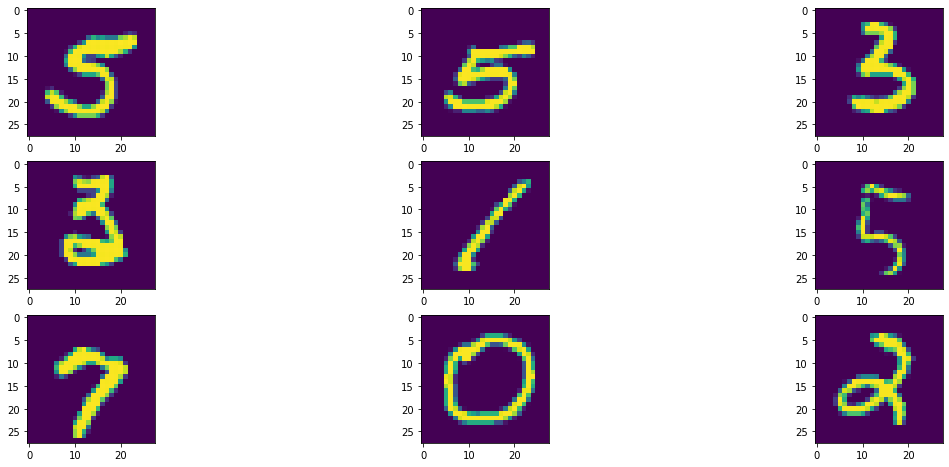

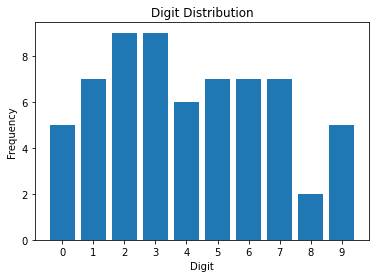

In [5]:
# EDA
images, labels = next(iter(train_loader)) 
fig = plt.figure(figsize=(20,8))
for idx in range(9):
    plt.subplot(3, 3, idx+1) 
    plt.imshow(images[idx][0])
plt.show() 


counts = dict((i, 0) for i in range(10))
for label in labels:
    counts[label.item()] += 1

(k,v)=zip(*counts.items())
fig, ax = plt.subplots()
plt.title("Digit Distribution")
ax.bar(k, v)
plt.xticks(k) 
plt.ylabel("Frequency")
plt.xlabel("Digit")
plt.show()

In [6]:
# Train the model
num_epochs = 10
for epoch in range(num_epochs):
    for batch_idx, (data, target) in enumerate(train_loader):
        optimizer.zero_grad()
        outputs = model(data)
        loss = criterion(outputs, target)
        loss.backward()
        optimizer.step()

In [7]:
# Test the model
test_loader = torch.utils.data.DataLoader(
  torchvision.datasets.MNIST('./data', train=False, download=True,
                             transform=torchvision.transforms.Compose([
                               torchvision.transforms.ToTensor(),
                               torchvision.transforms.Normalize(
                                 (0.1307,), (0.3081,))
                             ])),batch_size=64, shuffle=True)

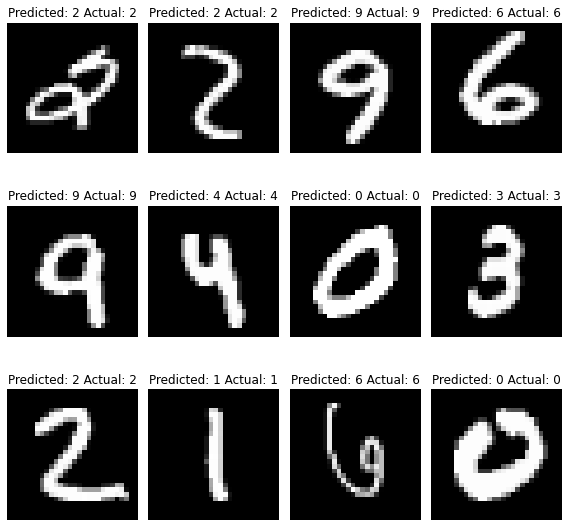

In [8]:
# Plot first 12 images
images, targets = next(iter(test_loader))
outputs = model(images)  
_, predictions = torch.max(outputs, 1)

fig = plt.figure(figsize=(8, 8))
for i in range(12):
    ax = fig.add_subplot(3, 4, i+1) 
    ax.set_title(f"Predicted: {predictions[i]} Actual: {targets[i]}")  
    ax.imshow(images[i].squeeze().numpy(), cmap='gray')
    ax.axis('off')
plt.tight_layout()
plt.show()

In [9]:
correct = 0
total = 0

with torch.no_grad():
    for data, target in test_loader:
        outputs = model(data)
        _, predicted = torch.max(outputs.data, 1)
        total += target.size(0)
        correct += (predicted == target).sum().item()

print('Accuracy: %d %%' % (100 * correct / total))

Accuracy: 98 %
